In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#ignore python warnings
warnings.filterwarnings('ignore')

In [116]:
#Read data from excel worksheets
df_Kayaking =pd.read_excel("V02Max_Combined.xlsx",sheet_name="Kayaking")
df_Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name="Athletes")
df_Triathlon=pd.read_excel("V02Max_Combined.xlsx",sheet_name="Triathlon")
df_Fencing=pd.read_excel("V02Max_Combined.xlsx",sheet_name="Fencing")

In [117]:
#concatenate all sports data to form a single dataframe
df_data = pd.concat([df_Fencing,df_Kayaking,df_Triathlon],ignore_index=True)

Q1.Can we predict VO2max based on Age and Ethnicity:
 -VO2Max=A higher VO₂max is generally associated with a greater 
capacity for sustained exercise and is a predictor of endurance performance
in activities like running, cycling, and swimming.   

In [118]:

df_data_copy=df_data.copy()
df_Sum_VO2=df_data_copy.groupby('ID')['VO2'].sum().reset_index()

df_merge_VO2=pd.merge(df_Athletes, df_Sum_VO2[['ID', 'VO2']], on='ID')

df_merge_VO2['VO2max']=df_merge_VO2['VO2']/df_merge_VO2['Weight']


threshold=df_merge_VO2['VO2max'].median()

df_merge_VO2['VO2max_Binary'] = df_merge_VO2['VO2max'].apply(lambda x: 1 if x > threshold else 0)

gender_mapping = {'Male': 0, 'Female': 1}
ethnicity_mapping = {'African': 0, 'Asian': 1, 'White': 2, 'Latino': 3}  # Adjust as needed


df_merge_VO2['Gender_binary'] = df_merge_VO2['Gender'].map(gender_mapping)
df_merge_VO2['Ethnicity_numeric'] = df_merge_VO2['Ethnicity'].map(ethnicity_mapping)



In [119]:
df_merge_VO2

,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,VO2,VO2max,VO2max_Binary,Gender_binary,Ethnicity_numeric
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,2298.775092,42.807730,0,1,0
1,2,15,56.2,162,80,127,fencing,Male,African,Ethan,Reynolds,2171.152256,38.632602,0,0,0
2,3,16,89.9,191,155,300,fencing,Male,White,Jackson,Harper,6266.538536,69.705657,1,0,2
3,4,16,76.5,180,215,275,fencing,Male,White,Liam,Sanchez,5889.725663,76.989878,1,0,2
4,5,17,76.4,186,110,172,fencing,Female,White,Ava,Thompson,6627.133058,86.742579,1,1,2
5,6,17,65.6,169,131,186,fencing,Female,White,Sophia,Rodriguez,4702.172897,71.679465,1,1,2
6,7,15,49.8,165,65,108,fencing,Female,White,Grace,Simmons,1912.518617,38.403988,0,1,2
7,8,15,51.2,165,80,133,fencing,Female,White,Aiden,Bennett,2294.891090,44.822092,0,1,2
8,9,14,57.1,176,50,125,fencing,Female,African,Chloe,Price,2837.718226,49.697342,0,1,0
9,10,14,58.8,177,101,162,fencing,Female,African,Lily,Jordan,3241.183654,55.122171,0,1,0


In [101]:
X = df_merge_VO2[['age','Ethnicity_numeric']].values
y = df_merge_VO2.iloc[:,-1].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
X_train.shape, X_test.shape
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)
log_reg.score(X_test_std, y_test)


0.5

In [128]:
df_data_copy = df_data.copy()
#calculated differences of RR_intervals
df_data_copy["HRV"]= df_data_copy.groupby("ID")["RR"].diff()

df_final = pd.merge(df_merge_VO2, df_data_copy[['ID', 'HRV']], on='ID')
df_final['VO2max']=df_final['VO2']/df_final['Weight']


In [125]:
df_final=df_final.dropna()

In [129]:
df_final

,ID,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,VO2,HRV,VO2max
0,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,2298.775092,NaN,42.807730
1,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,2298.775092,0.0,42.807730
2,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,2298.775092,-40.0,42.807730
3,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,2298.775092,80.0,42.807730
4,1,15,53.7,161,50,140,fencing,Female,African,Olivia,Martinez,2298.775092,164.0,42.807730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52057,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,3223.988381,8.0,81.208775
52058,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,3223.988381,-8.0,81.208775
52059,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,3223.988381,0.0,81.208775
52060,18,12,39.7,158,65,168,triathlon,Male,Latino,Owen,Myers,3223.988381,12.0,81.208775


In [114]:
df_data_copy.dropna()


,ID,time,RR,VO2,power,HRV
1,1,-130.168,672.0,0.302008,0,0.0
2,1,-129.536,632.0,0.301336,0,-40.0
3,1,-128.824,712.0,0.301336,0,80.0
4,1,-127.948,876.0,0.301336,0,164.0
5,1,-127.232,716.0,0.371173,0,-160.0
...,...,...,...,...,...,...
52057,18,947.288,536.0,0.507071,0,8.0
52058,18,947.816,528.0,0.507071,0,-8.0
52059,18,948.344,528.0,0.507071,0,0.0
52060,18,948.884,540.0,0.507071,0,12.0


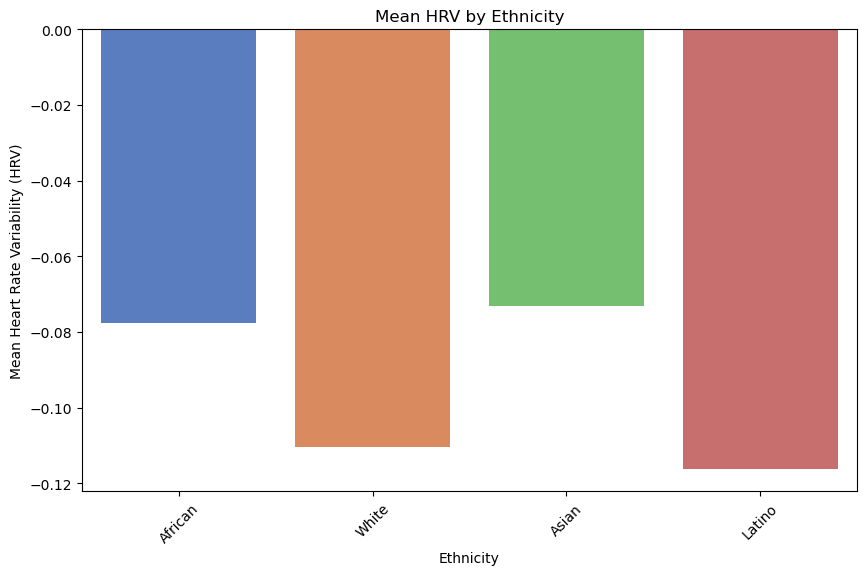

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot with HRV and Ethnicity
sns.barplot(x='Ethnicity', y='HRV', data=df_final, ci=None, palette='muted')


plt.xlabel('Ethnicity')
plt.ylabel('Mean Heart Rate Variability (HRV)')
plt.title('Mean HRV by Ethnicity')


plt.xticks(rotation=45)

# Show the plot
plt.show()
